In [728]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [665]:
df = pd.read_csv("../data/vehicle loand dataset.csv", header=0)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [666]:
df.head(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [667]:
df.shape

(121856, 40)

In [668]:
df.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [669]:
df1 = df.drop("ID", axis = 1)
df1 = df1.drop("Social_Circle_Default", axis = 1)
df1 = df1.drop("Own_House_Age", axis = 1)
df1 = df1.drop("Client_Occupation", axis = 1)
df1 = df1.drop("Mobile_Tag", axis = 1)
df1 = df1.drop("Score_Source_3", axis = 1)
df1 = df1.drop("Credit_Bureau", axis = 1)
df1 = df1.drop("Score_Source_1", axis = 1)

In [670]:
print(df1.isnull().sum())

Client_Income                 3607
Car_Owned                     3581
Bike_Owned                    3624
Active_Loan                   3635
House_Own                     3661
Child_Count                   3638
Credit_Amount                 3632
Loan_Annuity                  4812
Accompany_Client              1746
Client_Income_Type            3701
Client_Education              3645
Client_Marital_Status         3473
Client_Gender                 2413
Loan_Contract_Type            3651
Client_Housing_Type           3687
Population_Region_Relative    4857
Age_Days                      3600
Employed_Days                 3649
Registration_Days             3614
ID_Days                       5968
Homephone_Tag                    0
Workphone_Working                0
Client_Family_Members         2410
Cleint_City_Rating            2409
Application_Process_Day       2428
Application_Process_Hour      3663
Client_Permanent_Match_Tag       0
Client_Contact_Work_Tag          0
Type_Organization   

In [671]:
df1 = df1.dropna()

In [672]:
df1.isnull().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Homephone_Tag                 0
Workphone_Working             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_Source_2                0
Phone_Change                  0
Default 

In [673]:
df1.describe()

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_2,Phone_Change,Default
count,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000
mean,0.342957,0.332986,0.498196,0.693541,0.413107,0.201373,0.280843,2.149230,2.029913,3.154457,12.068774,0.516352,969.016575,0.080903
std,0.474702,0.471286,0.500001,0.461027,0.724951,0.401030,0.449415,0.913309,0.502804,1.758049,3.274093,0.636380,829.101278,0.272688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000005,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.387957,278.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.563454,765.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.662939,1577.250000,0.000000
max,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,100.000000,4121.000000,1.000000


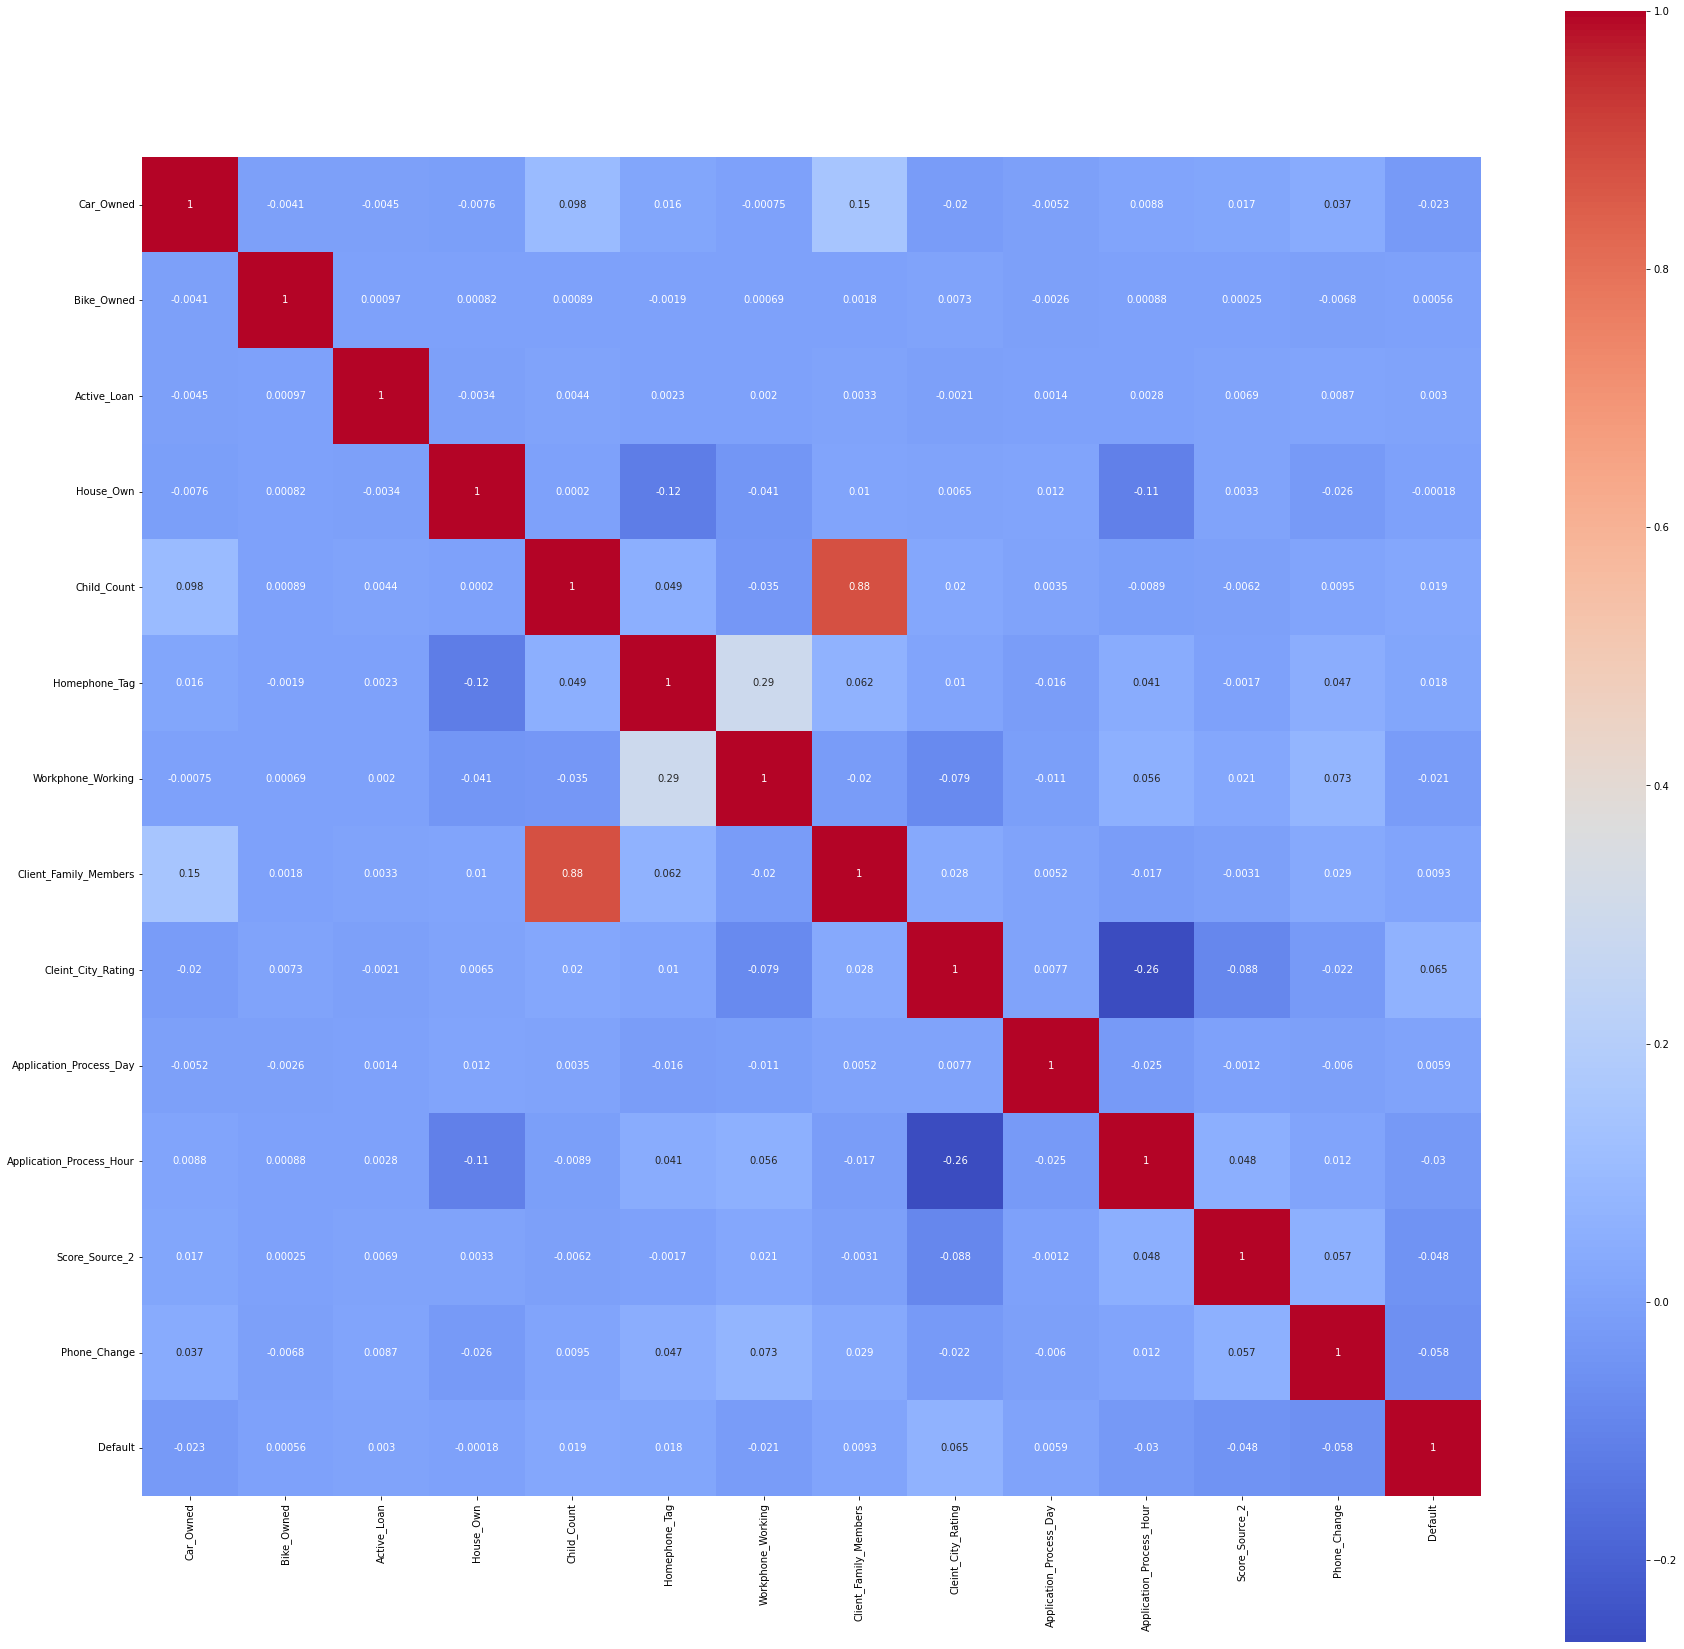

In [674]:
plt.figure(figsize=(30,30))
sns.heatmap(df1.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [675]:
def correlation_fix(data, treshold):

    corr_cols_set = set()

    corr_matrix = df1.corr()

    m = corr_matrix.shape[0]

    n = corr_matrix.shape[1]

    for i in range(m):

        for j in range(n):

            if (abs(corr_matrix.iloc[i, j]) >= treshold):

                col = corr_matrix.columns[i]

                corr_cols_set.add(col)

    return corr_cols_set


In [676]:
corr_cols_set = correlation_fix(df1, 0.5)
corr_cols_set

{'Active_Loan',
 'Application_Process_Day',
 'Application_Process_Hour',
 'Bike_Owned',
 'Car_Owned',
 'Child_Count',
 'Cleint_City_Rating',
 'Client_Family_Members',
 'Default',
 'Homephone_Tag',
 'House_Own',
 'Phone_Change',
 'Score_Source_2',
 'Workphone_Working'}

## correlated column dataframe

In [677]:

df_ = pd.DataFrame()
for i in range(len(corr_cols_set)):
    df_[f"X{i}"] = df1.iloc[:,i]

df_["Default"] = df1.iloc[:,-1]
df_.head(8)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Default
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,0
5,11250,0.0,1.0,1.0,1.0,1.0,13752,653.85,Alone,Service,Secondary,W,Female,CL,0
6,15750,1.0,1.0,0.0,1.0,0.0,128835,3779.55,Alone,Retired,Secondary,S,Male,CL,0
7,13500,0.0,0.0,1.0,1.0,0.0,60415.2,3097.8,Alone,Retired,Secondary,M,Male,CL,0
10,27000,0.0,0.0,1.0,1.0,1.0,67500,3375,Alone,Govt Job,Graduation,S,Male,RL,0
11,15750,0.0,0.0,0.0,0.0,1.0,149963.85,4397.85,Alone,Service,Graduation,M,Male,CL,0
13,8100,0.0,1.0,0.0,0.0,0.0,90000,3826.35,Relative,Retired,Secondary,M,Male,CL,0
15,45000,1.0,0.0,0.0,1.0,1.0,105493.5,4482.45,Alone,Commercial,Secondary,M,Female,CL,0


In [678]:
df_.dtypes

X0          object
X1         float64
X2         float64
X3         float64
X4         float64
X5         float64
X6          object
X7          object
X8          object
X9          object
X10         object
X11         object
X12         object
X13         object
Default      int64
dtype: object

In [679]:
df_.describe(include='all')

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Default
count,53756,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.0,53756,53756,53756,53756,53756,53756,53756,53756.000000
unique,982,NaN,NaN,NaN,NaN,NaN,5283.0,12444,7,8,5,4,3,2,NaN
top,13500,NaN,NaN,NaN,NaN,NaN,45000.0,900,Alone,Service,Secondary,M,Male,CL,NaN
freq,5468,NaN,NaN,NaN,NaN,NaN,1139.0,878,43673,27719,38193,39571,35384,48711,NaN
mean,NaN,0.342957,0.332986,0.498196,0.693541,0.413107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080903
std,NaN,0.474702,0.471286,0.500001,0.461027,0.724951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.272688
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [680]:
for k in range(0,9):

    for x in df_['X'+str(k)]:
        
        if (x == '$'):
            df_.drop(df_[df_['X'+str(k)] == '$'].index, inplace = True)

In [681]:
for k in range(0,9):

    for x in df_['X'+str(k)]:
        
        if (x == '#VALUE!'):
            df_.drop(df_[df_[f'X{k}'] == '#VALUE!'].index, inplace = True)

In [682]:
for k in range(0,9):

    for x in df_['X'+str(k)]:
        
        if (x == 'null'):
            df_.drop(df_[df_[f'X{k}'] == 'null'].index, inplace = True)

In [683]:
for k in range(9,14):

    for x in df_['X'+str(k)]:     
        if (x == 'XNA'):
            df_.drop(df_[df_[f'X{k}'] == 'XNA'].index, inplace = True)

In [684]:
cols = df_.columns
num_cols = df_._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['X12', 'X0', 'X11', 'X8', 'X6', 'X9', 'X10', 'X13', 'X7']

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


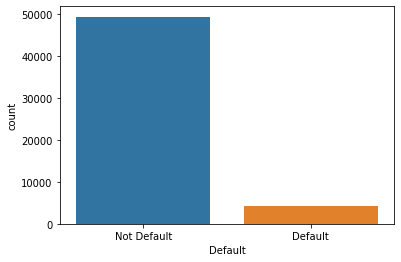

In [685]:
pred_var = sns.countplot(df_['Default'])
pred_var.set_xticklabels(['Not Default','Default'])
plt.show()

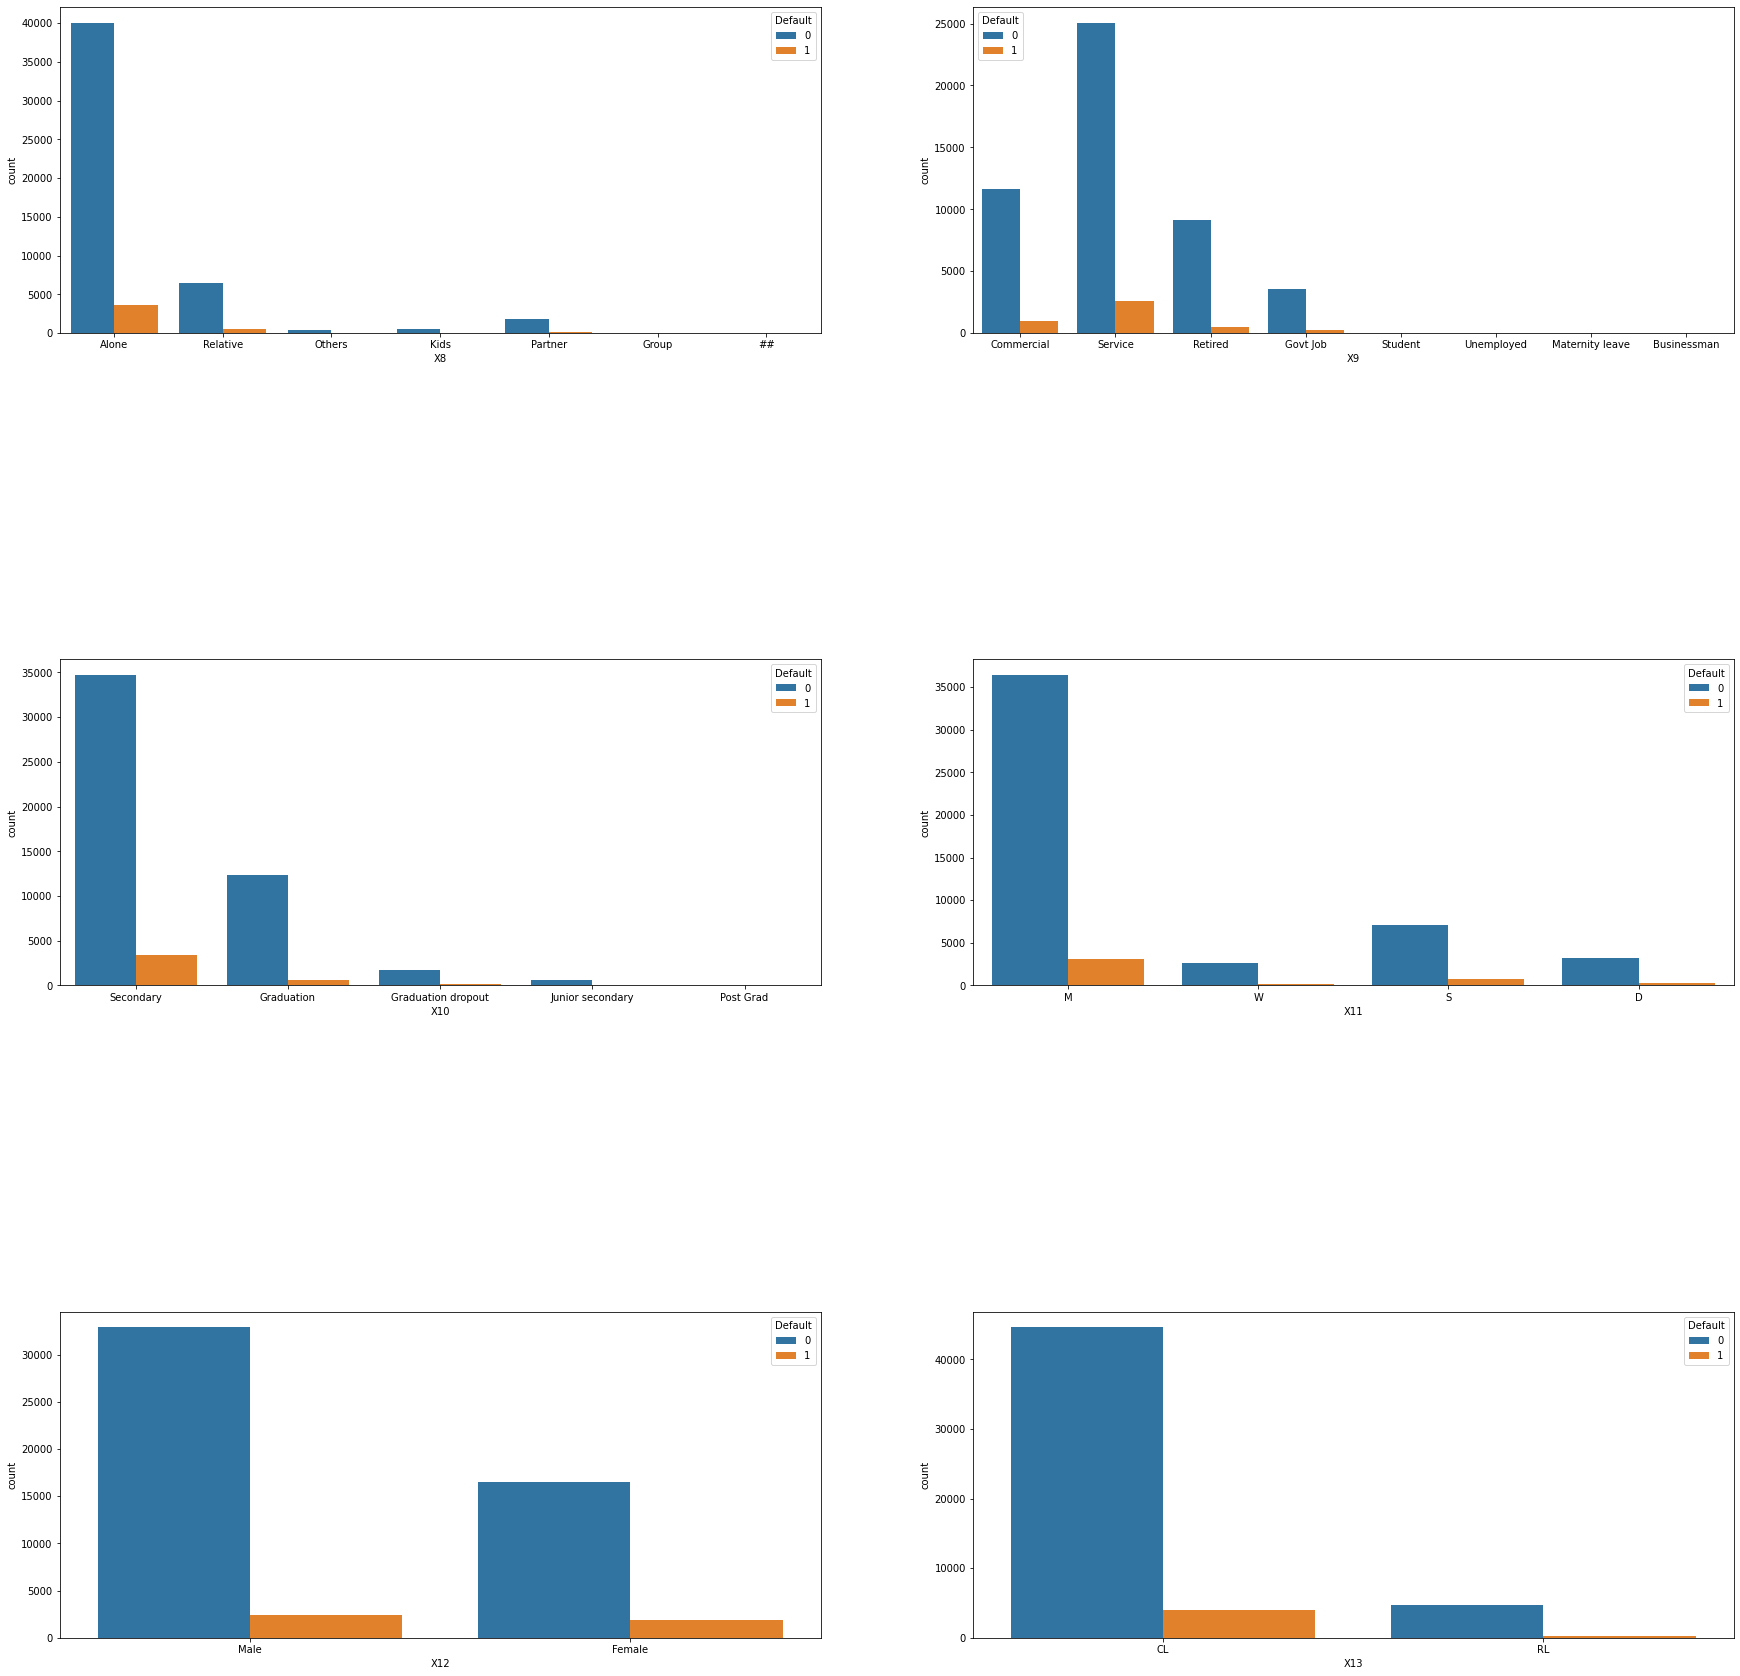

In [686]:
catg_cols = ['X8','X9','X10','X11','X12','X13']

figure, axes = plt.subplots(3, 2, figsize = (30, 30))

for index, catg_col in enumerate(catg_cols):

    row, col = index // 2, index % 2

    sns.countplot( x = catg_col, data = df_, hue = 'Default', ax=axes[row, col] ) 


plt.subplots_adjust(hspace = 1 )

In [687]:
X = df_.drop("Default",axis=1)  # independent columns
Y = df_.iloc[:,-1]   # target column 

In [688]:
X

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL
5,11250,0.0,1.0,1.0,1.0,1.0,13752,653.85,Alone,Service,Secondary,W,Female,CL
6,15750,1.0,1.0,0.0,1.0,0.0,128835,3779.55,Alone,Retired,Secondary,S,Male,CL
7,13500,0.0,0.0,1.0,1.0,0.0,60415.2,3097.8,Alone,Retired,Secondary,M,Male,CL
10,27000,0.0,0.0,1.0,1.0,1.0,67500,3375,Alone,Govt Job,Graduation,S,Male,RL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121850,12150,0.0,0.0,1.0,0.0,0.0,78192,2383.65,Alone,Retired,Secondary,S,Male,CL
121852,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,Commercial,Graduation,M,Female,CL
121853,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,Govt Job,Secondary,M,Male,CL
121854,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,Service,Graduation,M,Female,CL


In [689]:
df_.X10.unique()

array(['Secondary', 'Graduation', 'Graduation dropout',
       'Junior secondary', 'Post Grad'], dtype=object)

In [690]:
Y

0         0
5         0
6         0
7         0
10        0
         ..
121850    0
121852    0
121853    0
121854    0
121855    0
Name: Default, Length: 53739, dtype: int64

In [691]:
X.head(5)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL
5,11250,0.0,1.0,1.0,1.0,1.0,13752,653.85,Alone,Service,Secondary,W,Female,CL
6,15750,1.0,1.0,0.0,1.0,0.0,128835,3779.55,Alone,Retired,Secondary,S,Male,CL
7,13500,0.0,0.0,1.0,1.0,0.0,60415.2,3097.8,Alone,Retired,Secondary,M,Male,CL
10,27000,0.0,0.0,1.0,1.0,1.0,67500,3375,Alone,Govt Job,Graduation,S,Male,RL


In [692]:
X.X8.unique()

array(['Alone', 'Relative', 'Others', 'Kids', 'Partner', 'Group', '##'],
      dtype=object)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


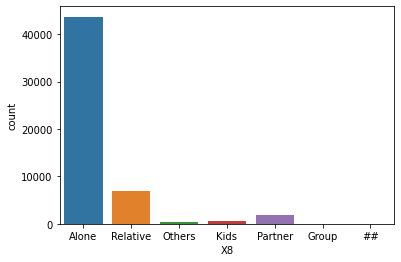

In [693]:
pred_var = sns.countplot(X['X8'])
pred_var.set_xticklabels(['Alone', 'Relative', 'Others', 'Kids', 'Partner', 'Group', '##'])
plt.show()

In [694]:
X['X8'] = [x if x in ('Alone','Relative') else 'Other' for x in X['X8']]

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


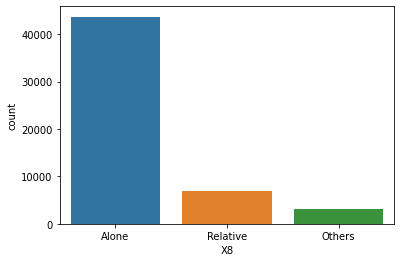

In [695]:
pred_var = sns.countplot(X['X8'])
pred_var.set_xticklabels(['Alone', 'Relative', 'Others'])
plt.show()

In [696]:
X.X9.unique()

array(['Commercial', 'Service', 'Retired', 'Govt Job', 'Student',
       'Unemployed', 'Maternity leave', 'Businessman'], dtype=object)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


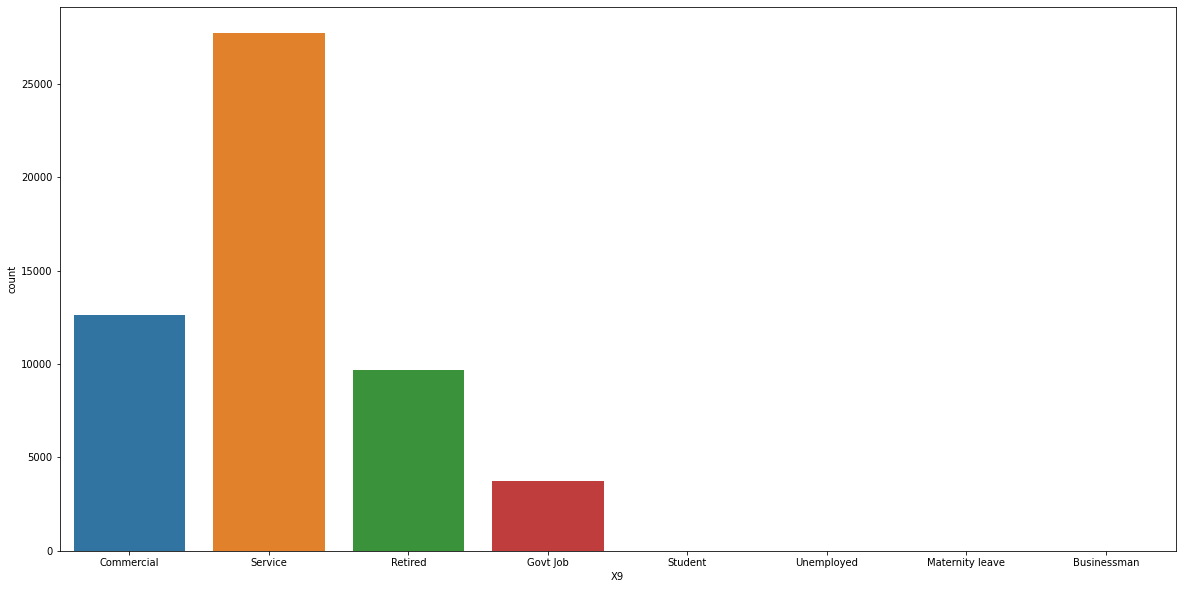

In [697]:
fig = plt.figure() 
fig.set_size_inches(20, 10)
pred_var = sns.countplot(X['X9'])
pred_var.set_xticklabels(['Commercial', 'Service', 'Retired', 'Govt Job', 'Student','Unemployed', 'Maternity leave', 'Businessman'])
plt.show()

In [698]:
X['X9'] = [x if x in ('Commercial', 'Service', 'Govt Job') else 'Other' for x in X['X9']]

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


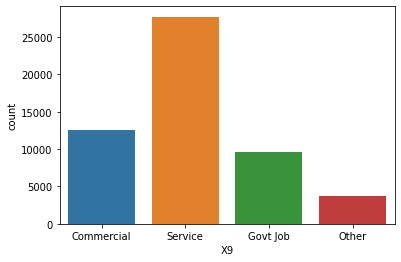

In [699]:
pred_var = sns.countplot(X['X9'])
pred_var.set_xticklabels(['Commercial', 'Service', 'Govt Job', 'Other'])
plt.show()

In [700]:
X.X10.unique()

array(['Secondary', 'Graduation', 'Graduation dropout',
       'Junior secondary', 'Post Grad'], dtype=object)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


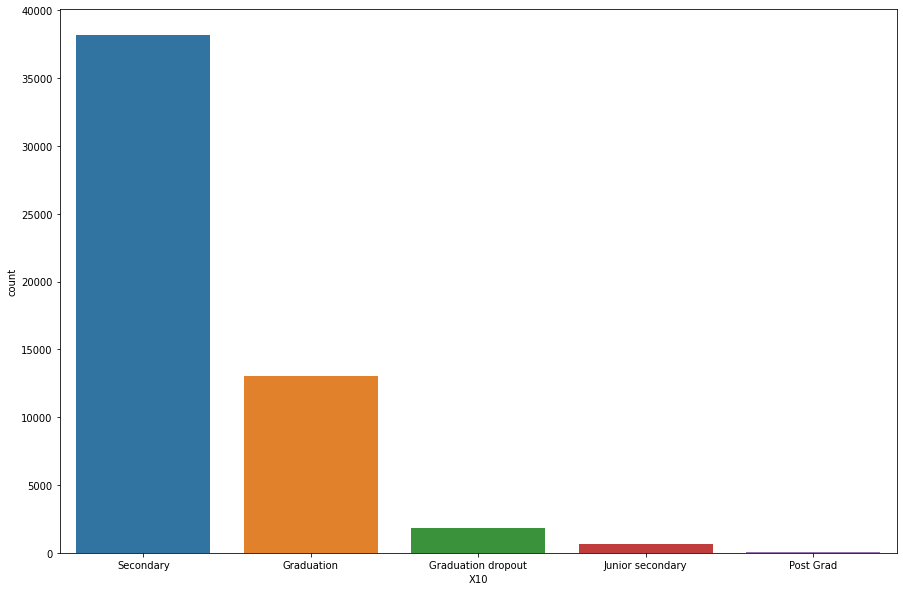

In [701]:
fig = plt.figure() 
fig.set_size_inches(15, 10)
pred_var = sns.countplot(X['X10'])
pred_var.set_xticklabels(['Secondary', 'Graduation', 'Graduation dropout', 'Junior secondary', 'Post Grad'])
plt.show()

In [702]:
X['X10'] = [x if x in ('Secondary', 'Graduation') else 'Other' for x in X['X10']]

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


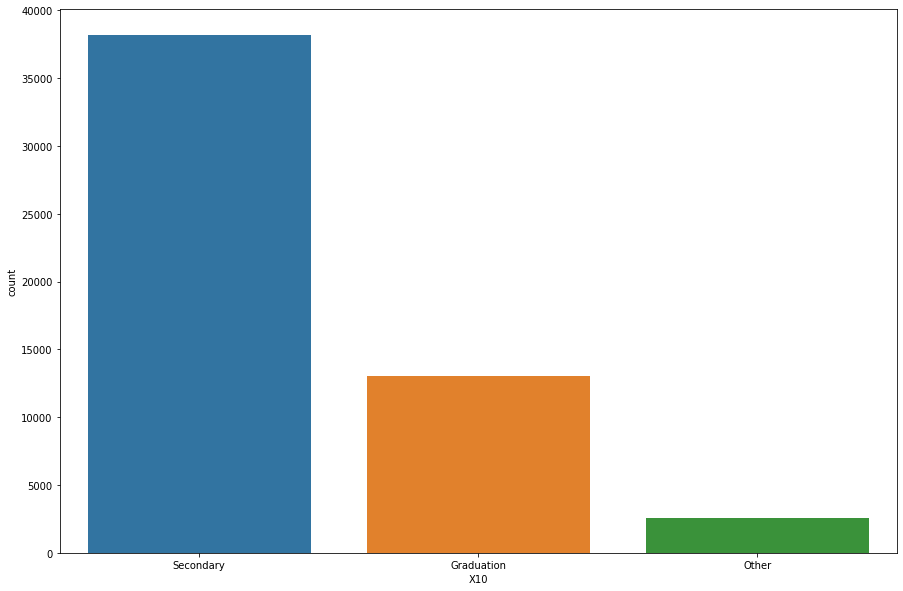

In [703]:
fig = plt.figure() 
fig.set_size_inches(15, 10)
pred_var = sns.countplot(X['X10'])
pred_var.set_xticklabels(['Secondary', 'Graduation', 'Other'])
plt.show()

In [704]:
X.X11.unique()

array(['M', 'W', 'S', 'D'], dtype=object)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


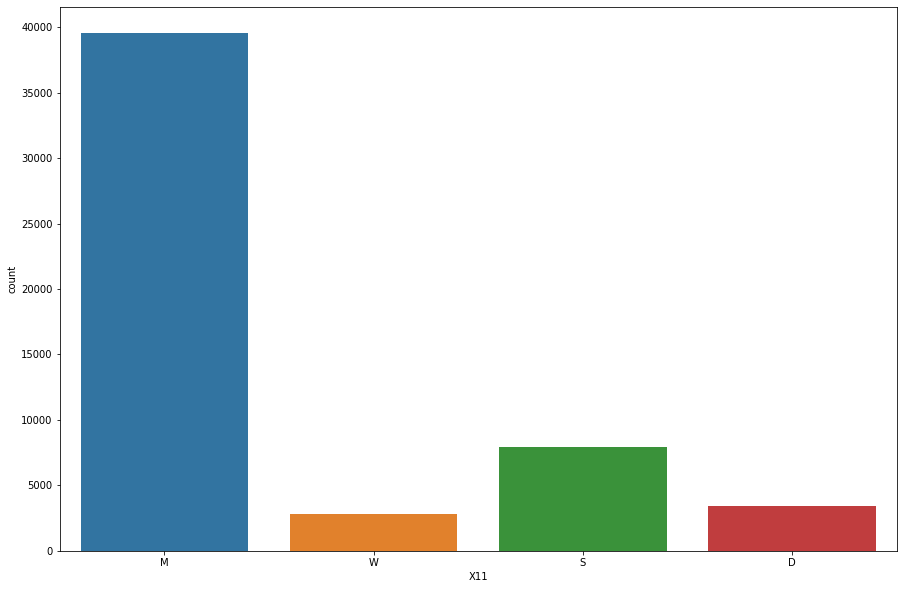

In [705]:
fig = plt.figure() 
fig.set_size_inches(15, 10)
pred_var = sns.countplot(X['X11'])
pred_var.set_xticklabels(['M', 'W', 'S', 'D'])
plt.show()

In [706]:
X.X12.unique()

array(['Male', 'Female'], dtype=object)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


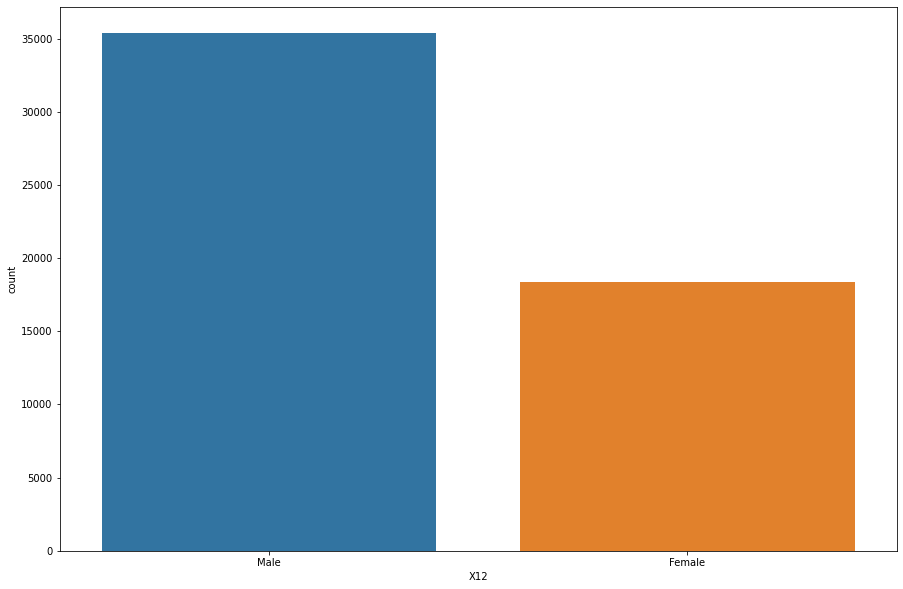

In [707]:
fig = plt.figure() 
fig.set_size_inches(15, 10)
pred_var = sns.countplot(X['X12'])
pred_var.set_xticklabels(['Male', 'Female'])
plt.show()

In [708]:
X.X13.unique()

array(['CL', 'RL'], dtype=object)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


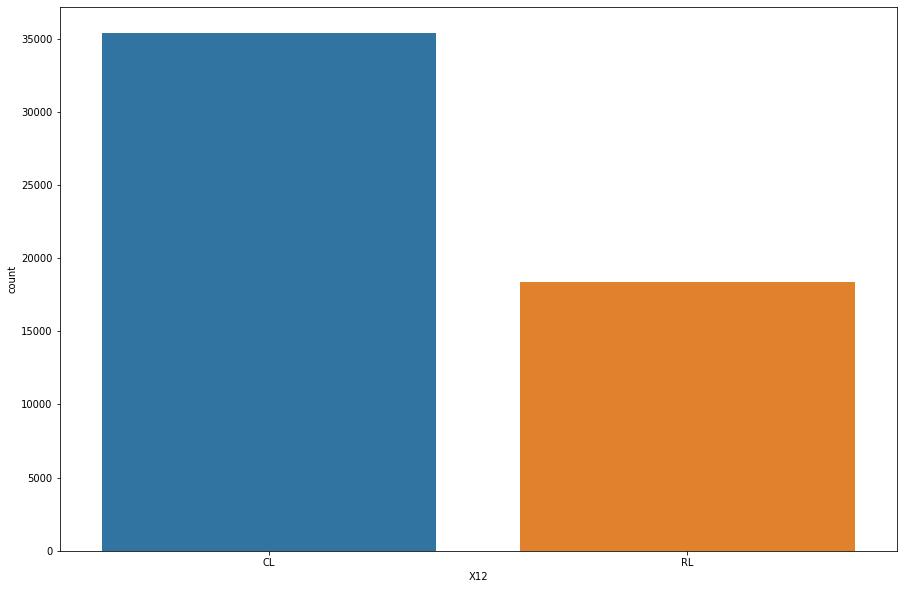

In [709]:
fig = plt.figure() 
fig.set_size_inches(15, 10)
pred_var = sns.countplot(X['X12'])
pred_var.set_xticklabels(['CL', 'RL'])
plt.show()

In [720]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3)

In [734]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transform = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8, 9, 10, 11, 12, 13])], remainder='passthrough')
X_1 = np.array(transform.fit_transform(x_train))
X_2 = np.array(transform.fit_transform(x_test))

In [735]:
X_1.shape

(37617, 26)

In [736]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_,y_train)

LogisticRegression()

In [737]:
print("Accuracy on training set:", logistic_model.score(X_1 , y_train))

Accuracy on training set: 0.9191588909269746


In [738]:
print("Accuracy on test set:", logistic_model.score(X_2 , y_test))

Accuracy on test set: 0.9189926808088327


In [739]:
prediction_test = logistic_model.predict(X_2)

classes = ['Not Default' , 'Default']

def plot_confusionmatrix(pred , test,dom):

    print(f'{dom} Confusion matrix')

    cf = confusion_matrix(pred  , test)

    sns.heatmap(cf , annot = True , yticklabels = classes , xticklabels = classes , cmap = 'Blues' , fmt = 'g' )

    plt.tight_layout()

    plt.show() 

Test Confusion matrix


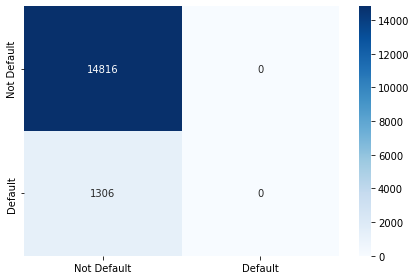

In [740]:
plot_confusionmatrix(y_test , prediction_test , dom = 'Test' )

In [741]:
prediction_train = logistic_model.predict(X_1)

Test Confusion matrix


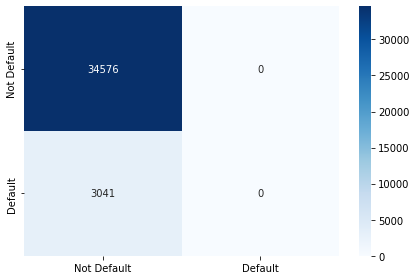

In [742]:
plot_confusionmatrix(y_train , prediction_train , dom = 'Test' )